<a href="https://colab.research.google.com/github/Partha16/myDataVizProjects/blob/main/SchoolsPerformanceComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go 
import plotly.figure_factory as ff

df = pd.read_excel('/content/drive/MyDrive/Excel Sheets/student-mat.xls')

In [ ]:
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


Visualizing the count of different categories of students using Sun burst plot.

In [ ]:
fig = px.sunburst(df, path=['school', 'address', 'sex','age'],color='failures')
fig.update_layout(title = 'Sun Burst chart of Students',
                  paper_bgcolor="ivory",
                  margin=dict(l=10, r=10, t=39, b=20))
fig.show()



1.   It is inferred that female and male students are almost eqaul in all categories
2.   MS school has higher failures on average than GP school
3.We can also see that Rural(R) people have more failures on average than urban(U) people this is true in the case of both schools.
4.There is no definite proof that there are more failures in the male students than female students.
5.Students who are older in age are on average have more failures than younger students, indiicating the fact that most older students i.e., students with higher age than 18 are redoing their course.



Visualizing the relationships between the days absent and Final Grade and Mother's Education level using a bubble plot.

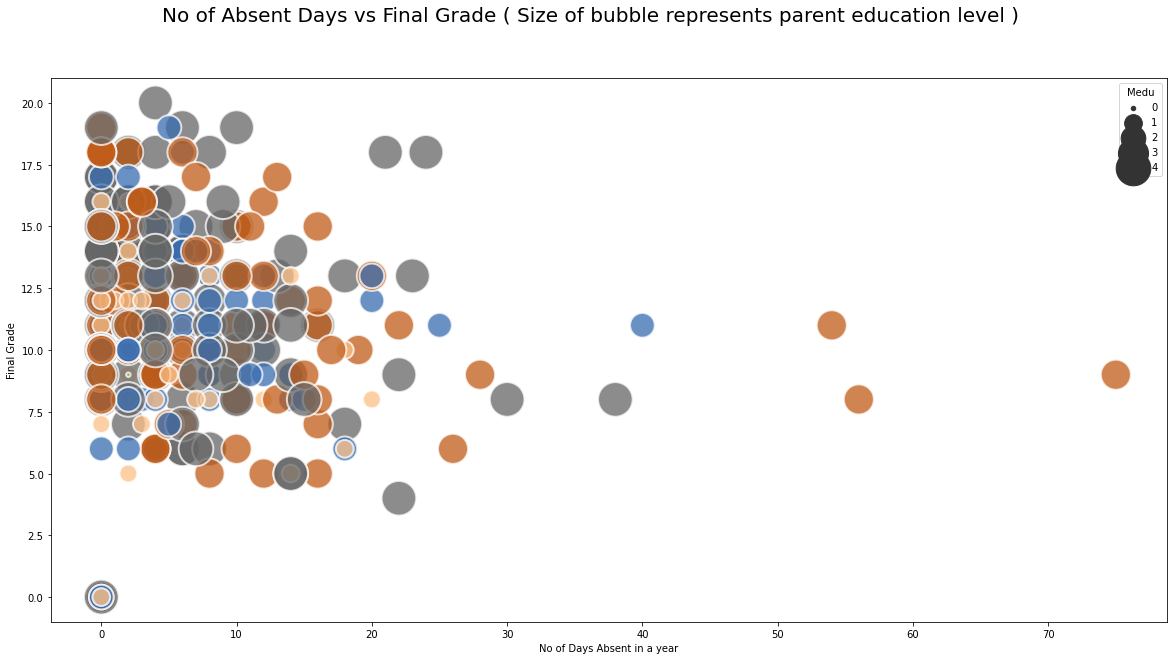

In [ ]:
fig=plt.figure(figsize=(20,10))

sns.scatterplot(data=df.loc[df['G3'] <= 20], x="absences", y="G3", size=df['Medu'], c=df['Medu'] ,cmap="Accent", 
    alpha=0.75, 
    edgecolors="black", 
    linewidth=2,
    sizes=(20,1200))

plt.suptitle('No of Absent Days vs Final Grade ( Size of bubble represents parent education level )', fontsize=20)
plt.xlabel('No of Days Absent in a year')
plt.ylabel('Final Grade')
plt.show()

It can be observed that high number of absent days does mean a lower grade regardless of the parent's Education level. But to get a higher final grade, number of absent days should be low and the parent's education level should be high. Even that is not a guarentee but the having low absent days and a low parent education level means that the chance of you acquiring a good final grade is very slim.

Visualizing the dataset using a matrix of scatterplots.

In [ ]:
dfd = df[['G3','G2','G1','absences','health','age','school']]
fig = ff.create_scatterplotmatrix(dfd, diag='box',index = 'school')
fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=20),
    paper_bgcolor='ivory',
    width = 1000,
    height = 1000
)
fig.show()



Visualizing with Parallel sets.

In [ ]:
fig = px.parallel_categories(df,dimensions=['school','age','sex','address','romantic'],color=df['traveltime'],title="Parallel set Graph of Different Categories of Students")
fig.update_layout(paper_bgcolor='ivory')

fig.show()


There are lot of things to infer from this graph:
  i)Most MS school children have travel time greater than an hour.
  ii)More than half of children from the rural areas have a high travelling time.
  iii)Even though number of children of age 15,16,17,18 are almost same children of age 15 and 18 are less involved in romantic realtioships

Visualizing using stacked bar plots

In [ ]:
pig = px.histogram(data_frame= df,x='school',color = 'age',title = 'No of students in each school divided on age')
pig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightYellow",
)
pig.show()
fig = px.histogram(data_frame= df,x='school',color = 'sex',title = 'No of students in each school divided on sex')
pig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="Blue",
)
fig.show()

It can be inferred that GP school schools middle school children as can be seen from its fairly equal number of students of age 15 to 18 but MS school only teaches for children 17 and above, so it must be a diploma school.

Visualizing the dataset using tree map.

In [ ]:
df_clean = df.loc[df['G3']!=0]
fig = px.treemap(df_clean, path=['school','address', 'Mjob','famrel'], color='G3')
fig.update_layout(
    paper_bgcolor="ivory",
    title = 'Heat map '
)
fig.show()

Here the graph visualizes the mark obtained by each of the different categories of student's parents and their address.
The color of each block represents the average final grade (G3) of that block.
Inferences

1.   It is fairly obvious from the graph that Rural areas score less compared to Urban area children.
2.   Another curious observation is the fact that higher family realtionships (given by the number 1 to 5) means on average higher grade.
3.   Students with mothers in the health industry have a higher grade escpecially in the urban areas.

> Thus we can infer from the graph that family plays an important role in the shaping of a students math grades and shouldn't be neglected, escpecially the mother's role.




Visulaizing dataset using heat maps

In [ ]:
fig = go.Figure(data=go.Heatmap(
          x = df["freetime"],
          y = df["studytime"],
          z = df["G3"],
          type = 'heatmap',
          colorscale = 'ice',
          colorbar={'title':'Final Grade'}))
fig.update_layout(
    title='Heat map of Freetime and studytime over Final Grade',
    xaxis={'title':'Freetime'},
    yaxis={'title':'Studytime'},

    xaxis_nticks=10)

fig.show()



1.   It is inferred from the graph that students who have a low freetime daily but have a high studytime have a high grade on average.
2.   We can also see that regardless of freetime the Final grade depends upon Study time on average.


> Thus we can say that studytime in a student's day should be high to have a high grade.





Visualizing with dendrograms

In [ ]:
import plotly.figure_factory as ff

df_o= df[:361]
names = np.array(df_o['health'].tolist())
X = np.array(df_o['G3'].tolist()).reshape(19,19)
fig = ff.create_dendrogram(df_o[['health','G3']],
                           labels = names ,
                           color_threshold=1.5
                           )
fig.update_layout(width=1300,
                  height=1000,
                  xaxis={'showticklabels': True},
                  paper_bgcolor='white',
                  title = 'Dendrogram of Studenets health with final grade'
                  )
fig.show()